In [51]:
import pandas as pd

In [52]:
#Important Panda Terminologies
#DataFrame-A spreadsheet like structure
#Series-A single column

In [53]:
data=pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv",index_col=0)

In [54]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [55]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [56]:
#to get no :of rows and cols in the df
data.shape

(200, 4)

In [57]:
import seaborn as sns

In [58]:
#all plots will be displayed inside the book
%matplotlib inline

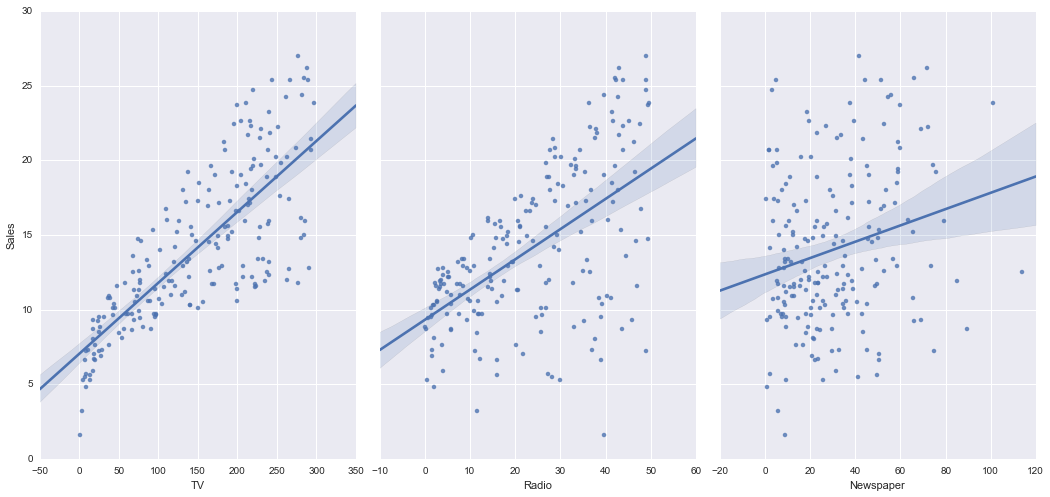

In [59]:
#size = height of each plot
#aspect=aspect * size =width of each plot
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],kind='reg',y_vars="Sales",size=7,aspect=0.7)

In [60]:
#There linear relatioship b/w TV and Sales

#Create a feature list
feature_cols=['TV','Radio','Newspaper']

In [61]:
X=data[feature_cols]

In [62]:

X.shape

(200, 3)

In [63]:
type(X)

pandas.core.frame.DataFrame

In [76]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [65]:
type(y)

pandas.core.series.Series

In [66]:
y.shape

(200,)

In [67]:
from sklearn.cross_validation import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
linereg = LinearRegression()

In [85]:
linereg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
print linereg.intercept_

2.87696662232


In [87]:
print linereg.coef_

[ 0.04656457  0.17915812  0.00345046]


In [92]:
#Pairing the Coeficents with the features
zip(feature_cols,linereg.coef_)

[('TV', 0.046564567874150253),
 ('Radio', 0.17915812245088841),
 ('Newspaper', 0.0034504647111804343)]

y=2.88+0.0466×TV+0.179×Radio+0.00345×Newspaper
How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

Important notes:
This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, β1 would be negative.

In [91]:
y_pred=linereg.predict(X_test)

In [93]:
#examples for Linear Regression model evaluation
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [94]:
from sklearn import metrics

In [95]:
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors, is a good metric for 
#Linear Regression Model evaluation

#1n∑i=1n|yi−y^i|

#Mean Squared Error (MSE) is the mean of the squared errors:
#1n∑i=1n(yi−y^i)2

In [96]:
metrics.mean_squared_error(true,pred)

150.0

#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
#1n∑i=1n(yi−y^i)2−−−−−−−−−−−−√

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [97]:
metrics.mean_absolute_error(true,pred)

10.0

In [102]:
#RMSE
import numpy as np
round(np.sqrt(metrics.mean_squared_error(true,pred)),2)

12.25

In [105]:
#RMSE of sales predictions
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.4046514230328948

Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!


In [106]:
feature_cols=['TV','Radio']

In [107]:
X=data[feature_cols]

In [108]:
X.shape

(200, 2)

In [109]:
y=data["Sales"]

In [110]:
y.shape

(200,)

In [115]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [116]:
X_train.shape

(150, 2)

In [117]:
y_train.shape

(150,)

In [118]:
linereg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
y_pred=linereg.predict(X_test)

In [121]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.3879034699382888

RMSE decreased , so the model is good without Newspaper feature